# Group 41 Study on Online Shoppers Purchases
## By Sachleen Parmar


## Data Description

1. This dataset is for shoppers intention when purchasing items online. Here is some basic information on it:

- The number of observations in the dataset is 12330.
- The number of variables in the dataset is 18.
- **Administrative** is a non-continuous integer that represents how many pages about account management the vistor visited 
- **Administrative_Duration** is a continuous variable representing the total time in seconds spent by the visitor on adminstrative pages
- **Informational** is a non-continuous integer that represents how many pages about Website, communication, and address information management the vistor visited 
- **Information_Duration** is a continuous variable representing the total time in seconds spent by the visitor on informational pages
- **ProductRelated** is a non-continuous integer that represents how many pages about related products the vistor visited
- **ProductRelated_Duration** is a continuous variable representing the total time in seconds spent by the visitor on related product pages
- **BounceRates** is a continuous variable representing the average bounce rate value of pages the visitor visited
- **ExitRates** is a continuous variable representing the average exit rate value of the pages the visitor visited
- **PageValues** is a numerical variable representing the average page value of the pages visited
- **SpecialDay** is a number from 0 to 1 representing how close the visit to the site was to some special holiday (1 being closer to the special holiday)
- **Month** is a categorical variable corresponding with what month the visit date occurred in 
- **OperatingSystems** is a categorical variable representing what operating system the visitor is using
- **Browser** is a categorical variable representing what browser the visitor is using
- **Region** is a categorical variable representing what region the visitor is from
- **TrafficType** is a categorical variable representing how the visitor arrived on the site.
- **VisitorType** is a string representing whether a visitor has been on the website before (Returning_Visitor), have never been on the website (New_Visitor), or Other
- **Weekend** is a boolean value with TRUE representing it is the weekend and FALSE being it is not
- **Revenue** is a boolean value with TRUE representing making revenue and FALSE representing no revenue made

  NOTE: To get information on the different variables the following source was used: Sakar, C.O., Polat, S.O., Katircioglu, M., & Kastro, Y. (2018). Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Computing and Applications, 31, 6893 - 6908.


2. Some of the data was collected using Google Analytics, which collects data for each page of a consumer website. How the rest of the data was collected is unknown. The citation for the data source is: <br>
&nbsp; Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention<br>
&nbsp; Dataset [Dataset]. UCI Machine Learning Repository.<br>
&nbsp; https://doi.org/10.24432/C5F88Q.

4. Pre-Selection of Variables
    - I believe that Month is a variable that can be dropped because if a month has something special (such as a holiday that will lead to more purchases) the Special Day variable encompasses this. I also think that the Bounce and Exit rate variables can be dropped as knowing if someone just bounced off a page or where they exited seems to be related to revenue in a way that is difficult for someone outside of the field to interpret. 

## Scientific Question

We want to predict whether or not a customer will produce revenue for the website, based on the information of the visitor (VisitorType, TrafficType, Region, Browser, OperatingSystems), whether it's close to a special day (SpecialDay), and which related products the user looked at (ProductRelated).

## Exploratory Data Analysis and Visualization

In [1]:
library(tidyverse)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
data = read_csv("https://raw.githubusercontent.com/sachleenparmar/OnlineShoppingProject/refs/heads/main/online_shoppers_intention.csv?token=GHSAT0AAAAAADNC3LRCGFLF77NO3LFHWSS62H2WGZQ")
head(data)

Rows: 12330 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Month, VisitorType
dbl (14): Administrative, Administrative_Duration, Informational, Informatio...
lgl  (2): Weekend, Revenue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [3]:
tidy_data <- data %>%
        filter(Region == 1) %>%
        select(-BounceRates, -ExitRates, -Month) %>%
        mutate(Region = as.factor(Region),
               Browser = as.factor(Browser),
               OperatingSystems = as.factor(OperatingSystems),
               SpecialDay = as.factor(SpecialDay),
               TrafficType = as.factor(TrafficType)
              )
head(tidy_data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.0000,0,0,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.0000,0,0,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.5000,0,0,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.2167,0,0,2,2,1,3,Returning_Visitor,FALSE,FALSE
1,0,0,0,0,0.0000,0,0,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0,0,0,3,738.0000,0,0.4,2,4,1,2,Returning_Visitor,FALSE,FALSE


### Data Wrangling
The first step done was to keep only region 1, as specified in the assignment. Next, I removed the variables discussed above that were not needed/ used for my model. Then, I changed all the categorical variables that were encoded as numbers to be of type factor, so that R can tell they are in fact categories. 

In [4]:
customer_type_plot <- tidy_data %>%
    ggplot() +
    geom_boxplot(aes(x = Revenue, y = PageValues, fill = VisitorType), outlier.alpha= 0.3) +
    scale_fill_manual(values=c("#ffbafc", "#e36bbd", "#cf3cac")) + 
    labs(x = "Whether Customer Bought Something (True) or Did Not (False)", 
        y = "How Many Pages the Customer Viewed",
        title = "Box Plot of Website Revenue vs Number of Pages\n Customer Viewed, Seperated for Customer Type",
        fill = "Type of Visitor Customer is:") +
    theme(
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 15),
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15)) + 
    ylim(0, 400)

In [5]:
related_prod_plot <- tidy_data %>%
    ggplot() +
    geom_boxplot(aes(x = Revenue, y = ProductRelated, fill = Weekend), outlier.alpha= 0.3) +
    scale_fill_manual(values=c("#ffbafc", "#cf3cac")) + 
    labs(x = "Whether Customer Bought Something (True) or Did Not (False)", 
        y = "How Many Related Products the Customer Viewed",
        title = "Box Plot of Website Revenue vs Number of Related\n Products Customer Viewed, Seperated for Weekend",
        fill = "Whether it is the Weekend or Not:") +
    theme(
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 15),
        plot.title = element_text(size = 20),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15)) +
    ylim(0, 400)

**Note: ylim() was used to remove some of the outliers, as there were very few outliers outside of the value 400. Removing those outliers helps with readability.**

Warning message:
“Removed 11 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


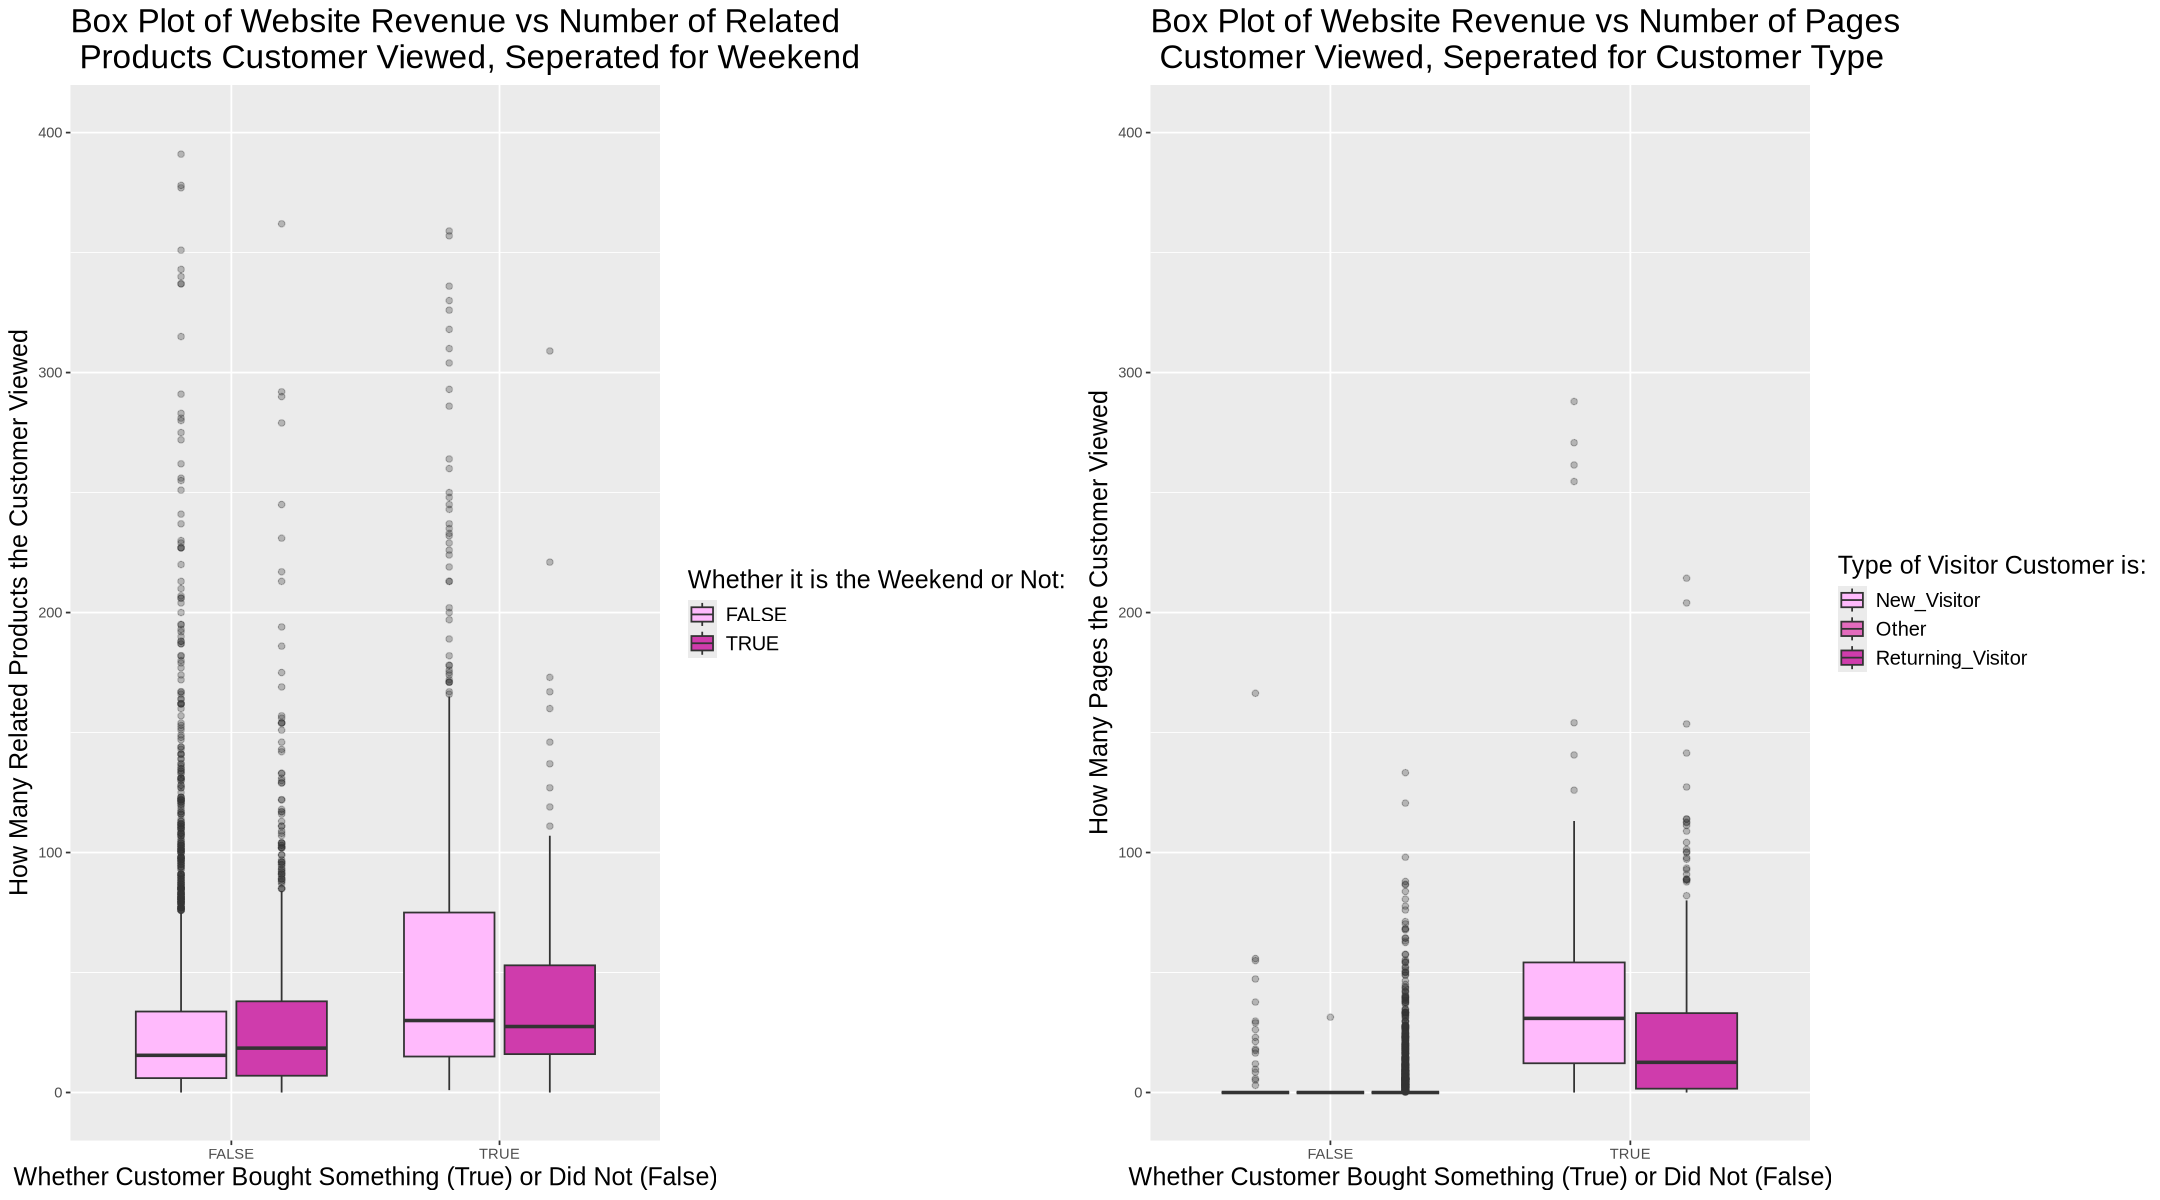

In [6]:
options(repr.plot.width=18, repr.plot.height=10)
grid.arrange(related_prod_plot, customer_type_plot, nrow = 1)

### Visualization
- I consider this plot relevant as it gives us an idea of how some of the variables of interest relate to our predictor, Revenue. One can use the plot to get a general idea if the variables they chose to use are actually useful, or if they should look do more EDA to see better patterns before starting the prediction model.
- From the first visualization I can see that there is not much of a difference between how many related products a customer viewed based on whether it is the weekend or not. However, generally customers who bought something seem to have looked at more pages. From the second visualization I can see that the more pages viewed the more likely the shopper is to provide revenue, and also new visitors are the most likely to buy based on the plot.
- From my visualization, one of the things I can see is that shoppers who didn't buy anything seem to view significantly fewer pages than the other group, which indicates less overlap in these groups. The weekend variable also doesn't seem to be very relevant, as the chances of someone buying something don't seem change much based on that variable. Overall the visualization lets me see that certain variables may have different relationships than I expected, and more EDA could be useful before beginning.
